<a href="https://colab.research.google.com/github/Utkarsh-TG/AashiProject/blob/main/N_player_age_game_RTS_CTS_setting_optimization_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from scipy.optimize import linprog
from matplotlib import pyplot as plt
import numpy as np

In [36]:
# Meta data for analysis
sig_dig= 4

delta = [1, 2, 3]
sigma_s = 1.01
sigma_c = 0.1*sigma_s
sigma_i = 0.001

def setParam():
  global delta, sigma_s, sigma_c, sigma_i
  delta = [1,2]
  sigma_s = 1.01
  sigma_c = 0.1*sigma_s
  sigma_i = 0.001

In [37]:
def optimum(delta, sigma_c, sigma_i, sigma_s):
  N = len(delta)
  # ages contain intial age for each node at the begining of our stage game
  ages = [round(d * sigma_s, sig_dig) for d in delta]
  total_delta = sum(ages)

  # minmax_i = - delta_i - sigma_c
  minmax = [round(sigma_c + age, sig_dig) for age in ages]

  # pc_coeff and pi_coeff
  pc_coeff = {
      "obj": round(total_delta + N*sigma_c, sig_dig),
      "inequality": [round(age + sigma_c, sig_dig) for age in ages],
      "equality": 1} 
  pi_coeff = {
      "obj": round(total_delta + N*sigma_i, sig_dig),
      "inequality": [round(age + sigma_i, sig_dig) for age in ages],
      "equality": 1} 

  #objective array
  obj = [round((N*sigma_s) + total_delta - age, sig_dig) for age in ages]
  #obj.extend([pc_coeff["obj"], pi_coeff["obj"]])
  obj.extend([pi_coeff["obj"]])
  obj = np.array(obj)
  obj = obj.reshape((N+1,))

  #lhs_inequality matrix
  lhs_ineq = np.zeros((N, N+2), dtype=float) + sigma_s
  lhs_ineq = []

  for i, age in enumerate(ages):
      row = [(age + sigma_s)] * (N+1)
      # reverting element to sigma_s along diagonal
      row[i] = sigma_s
    # row[-2] = pc_coeff["inequality"][i]
      row[-1] = pi_coeff["inequality"][i] 
      lhs_ineq.append(row)
  lhs_ineq = np.array(lhs_ineq)

  #Rhs_inequality matrix
  #rhs_ineq = minmax
  rhs_ineq = np.array(minmax).reshape(N,)

  lhs_eq = np.array([1] * (N+1)).reshape((1, N+1))
  rhs_eq = np.array([1]).reshape((1, ))
              
  bounds = [(0, 1)] * (N+1) # Bounds of p1, p2...p_n, p_c, p_i

  opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
              A_eq=lhs_eq, b_eq=rhs_eq, bounds=bounds)

  return(opt['x'])


In [38]:
print(optimum(delta, sigma_c, sigma_i, sigma_s))
setParam()
print(optimum(delta, sigma_c, sigma_i, sigma_s))

[1.07917225e-11 2.09332751e-11 9.91080275e-02 9.00891973e-01]
[1.96212987e-12 9.91080241e-02 9.00891976e-01]


In [57]:
_sigma_c = []
p1 = []
p2 = []
pi = []

for i in range(1,11):
  _sigma_c.append(i/10*sigma_s)
  prob = optimum(delta, _sigma_c[i-1], sigma_i, sigma_s)
  p1.append(prob[0])
  p2.append(prob[1])
  pi.append(prob[2])

print(p1)

[0.5500000000047072, 0.600000000006847, 0.650000000007542, 0.7000000000063226, 0.7500000000031877, 0.7999999999984555, 0.8499999999919348, 0.8999999999822355, 0.9500000000001345, 0.999999999999985]


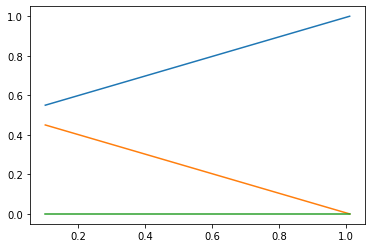

In [58]:
#plot

# Function to plot
plt.plot(_sigma_c, p1)
plt.plot(_sigma_c, p2)
plt.plot(_sigma_c, pi)
  
# function to show the plot
plt.show()

In [53]:
_delta = []
p1 = []
p2 = []
pi = []

for i in range(1,11):
  Delta = delta
  Delta[0] = i*sigma_s
  _delta.append(Delta[0])
  prob = optimum(Delta, sigma_c, sigma_i, sigma_s)
  p1.append(prob[0])
  p2.append(prob[1])
  pi.append(prob[2])

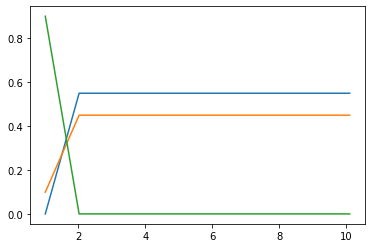

In [55]:
#plot

# Function to plot
plt.plot(_delta, p1)
plt.plot(_delta, p2)
plt.plot(_delta, pi)

  
# function to show the plot
plt.show()